# Tutorial 1: CSVs and NetCDFs
This tutorial will introduce you to the basics of working with oceanographic data in Python. We will use the [Pandas](https://pandas.pydata.org/) package to work with data in the form of comma-separated values (CSV) files, and the [xarray](http://xarray.pydata.org/en/stable/) package to work with data in the form of NetCDF files. We will also use the [Matplotlib](https://matplotlib.org/) package to plot our data.

To begin, we will import the packages we will be using in this tutorial. In a jupyter notebook, you can run a cell by pressing `Shift+Enter` or by clicking the "Run" button in the toolbar above.

All the data in this tutorial was obtained from the Intergrated Marine Observing System (IMOS) [data portal](https://data.aodn.org.au/).

In [54]:
import numpy as np # used for array operations
import pandas as pd # used for reading csv files
import xarray as xr # used for reading netCDF files
import matplotlib.pyplot as plt # used for plotting

We will begin by looking at a csv file containing data from an instrument called a [CTD](https://en.wikipedia.org/wiki/Conductivity,_temperature,_depth_sensor) that was deployed in the [Australian North West Shelf](https://en.wikipedia.org/wiki/North_West_Shelf). The CTD measures the conductivity, temperature and depth of the water column, and is used to measure the vertical distribution of salinity, temperature and density in the ocean. The data is stored in a csv file, which is a text file that contains comma-separated values. We can use the Pandas package to read the data from the csv file into a Pandas dataframe, which is a data structure that is similar to a spreadsheet or a table in a database.

In [55]:
df = pd.read_csv('CTD.csv',index_col='TIME') # read the csv file
df.index = pd.to_datetime(df.index) # convert the index to datetime
df.head() # display the first 5 rows of the data

,TIMESERIES,LATITUDE,LONGITUDE,NOMINAL_DEPTH,TEMP,TEMP_quality_control,CNDC,CNDC_quality_control,PRES_REL,PRES_REL_quality_control,DEPTH,DEPTH_quality_control,PSAL,PSAL_quality_control
TIME,,,,,,,,,,,,,,
2019-07-28 00:00:01.000004608,1,-17.758017,119.9061,147.2,24.1136,4.0,-0.000187,4.0,0.025,4.0,0.024850,4.0,NaN,4.0
2019-07-28 00:01:01.000001024,1,-17.758017,119.9061,147.2,24.1763,4.0,-0.000187,4.0,0.027,4.0,0.026839,4.0,NaN,4.0
2019-07-28 00:02:01.000007424,1,-17.758017,119.9061,147.2,24.1891,4.0,-0.000190,4.0,0.027,4.0,0.026839,4.0,NaN,4.0
2019-07-28 00:03:01.000003840,1,-17.758017,119.9061,147.2,24.1576,4.0,-0.000190,4.0,0.023,4.0,0.022862,4.0,NaN,4.0
2019-07-28 00:04:01.000000512,1,-17.758017,119.9061,147.2,24.1325,4.0,-0.000187,4.0,0.027,4.0,0.026839,4.0,NaN,4.0


You can plot the data in the dataframe using the `plot()` method.

<AxesSubplot:xlabel='TIME'>

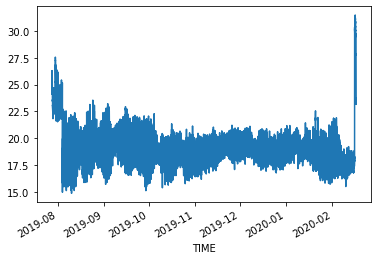

In [56]:
df['TEMP'].plot() # plot the temperature data

Now we arrive at the limitations of the format:
1. The data is stored in a text file, which means that it is not very efficient to store large amounts of data. For example, if we wanted to store 1000 data points, each with 3 variables, we would need to store 3000 values in a text file. If we wanted to store 1000 data points, each with 100 variables, we would need to store 100,000 values in a text file. This is not very efficient, and it is not very easy to work with.
2. Only the data is stored in the file, not the metadata. The metadata is the information about the data, such as the units of the variables, the instrument that was used to collect the data, the date and time the data was collected, etc. This is important information that we need to know in order to interpret the data correctly.
3. Each table is limited to 2 dimensions. This means that we can't store data that has more than 2 dimensions , such as a 3D grid of data (e.g., a model output), easily.

A data format that addresses these limitations is the NetCDF format. NetCDF stands for "Network Common Data Form". NetCDF is a binary file format that is designed to store multidimensional data, along with the metadata that describes the data.

Next we will examine data from an oceanographic instrument called an acoustic Doppler current profiler (ADCP). The ADCP measures the velocity of the water column, and is used to measure the vertical distribution of currents in the ocean. That is, we will have observations of the water velocity vector (u,v and w) for a range of depths over the water column.

In [57]:
ds = xr.open_dataset('ADCP.nc')
ds

<xarray.Dataset>
Dimensions:                     (TIME: 28479, DIST_ALONG_BEAMS: 21,
                                 HEIGHT_ABOVE_SENSOR: 21)
Coordinates:
  * TIME                        (TIME) datetime64[ns] 2019-08-02T08:59:00.000...
  * DIST_ALONG_BEAMS            (DIST_ALONG_BEAMS) float32 12.41 20.41 ... 172.4
  * HEIGHT_ABOVE_SENSOR         (HEIGHT_ABOVE_SENSOR) float32 12.41 ... 172.4
    LATITUDE                    float64 ...
    LONGITUDE                   float64 ...
    NOMINAL_DEPTH               float32 ...
Data variables: (12/63)
    TIMESERIES                  int32 ...
    UCUR                        (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    UCUR_quality_control        (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    VCUR                        (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    VCUR_quality_control        (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    WCUR                        (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ...                          ...
    ABSI2                       (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI2_quality_control       (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI3                       (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI3_quality_control       (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI4                       (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
    ABSI4_quality_control       (TIME, HEIGHT_ABOVE_SENSOR) float32 ...
Attributes: (12/57)
    abstract:                      The Queensland and Northern Australia moor...
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Australian Institute of Marine Science
    author_email:                  adc@aims.gov.au
    cdm_data_type:                 Station
    citation:                      The citation in a list of references is: "...
    ...                            ...
    time_deployment_end_origin:    TimeLastGoodData
    time_deployment_start:         2019-08-04T02:00:00Z
    time_deployment_start_origin:  TimeFirstGoodData
    title:                         Rowley Shoals Deployed 04/08/2019 on Trip ...
    toolbox_input_file:            /export/imos/Processed/NWS/NWSROW/NWSROW-1...
    toolbox_version:               2.6.14 - GLNXA64

Now that we have our ADCP data loaded in, just like we did with the CTD data, we can plot the data using the `plot()` method. This time, we will first make a figure with 3 subplots, one for each component of the velocity vector. We will then plot the data in each subplot.

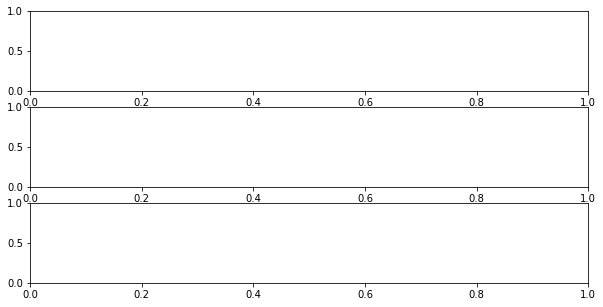

In [58]:
# here is an empty figure with 3 subplots
fig,axes = plt.subplots(nrows=3,figsize=(10,5))

In [59]:
axes # what is the variable axes?

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

So "axes" is a container that has 3 subplots in it. We can access each subplot using the `axes[0]`, `axes[1]` and `axes[2]` indices. We can then plot the data in each subplot using the `plot()` method and give it the "key word argument" `ax=axes[subplot number here]`.

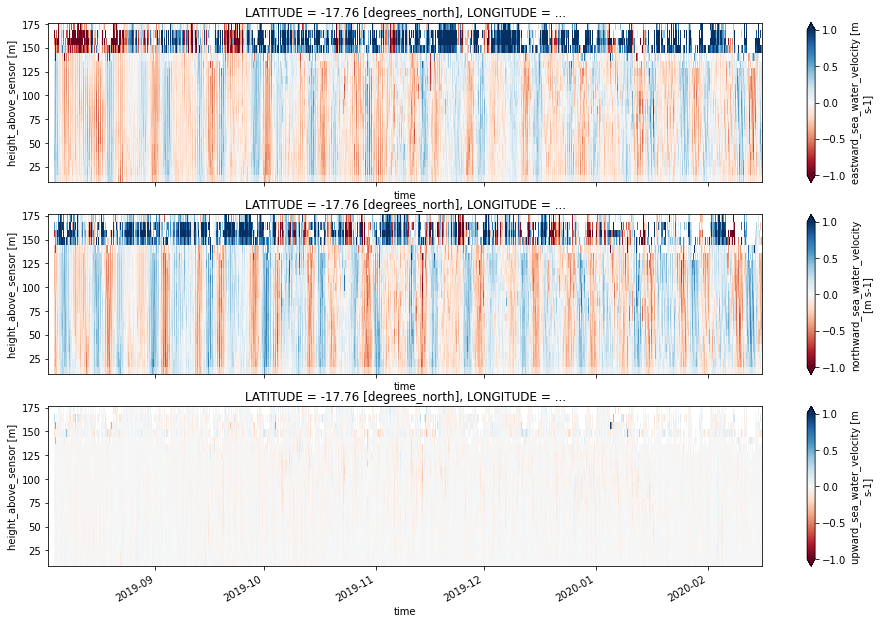

In [60]:
fig,axes = plt.subplots(nrows=3,figsize=(16,10),sharex=True)
ds['UCUR'].plot(ax=axes[0],x='TIME',vmin=-1,vmax=1,cmap='RdBu')
ds['VCUR'].plot(ax=axes[1],x='TIME',vmin=-1,vmax=1,cmap='RdBu')
ds['WCUR'].plot(ax=axes[2],x='TIME',vmin=-1,vmax=1,cmap='RdBu')

# Quality Assurance and Quality Control (QA/QC)
The data we have been working with so far has been "raw" data. The provider of the data (in this case, IMOS), has provided us with some indication of when the data is good!

In [61]:
ds['UCUR_quality_control']

<xarray.DataArray 'UCUR_quality_control' (TIME: 28479, HEIGHT_ABOVE_SENSOR: 21)>
[598059 values with dtype=float32]
Coordinates:
  * TIME                 (TIME) datetime64[ns] 2019-08-02T08:59:00.000003584 ...
  * HEIGHT_ABOVE_SENSOR  (HEIGHT_ABOVE_SENSOR) float32 12.41 20.41 ... 172.4
    LATITUDE             float64 -17.76
    LONGITUDE            float64 119.9
    NOMINAL_DEPTH        float32 157.7
Attributes:
    flag_meanings:                       No_QC_performed Good_data Probably_g...
    flag_values:                         [0 1 2 3 4 5 6 7 8 9]
    long_name:                           quality flag for eastward_sea_water_...
    quality_control_conventions:         IMOS standard flags
    quality_control_global:              B
    quality_control_global_conventions:  Argo reference table 2a (see http://...
    standard_name:                       eastward_sea_water_velocity status_flag

We can see that whenever the 'UCUR_quality_control' variable has a value of 1, the data is good. Lets use this information to filter out the bad data.

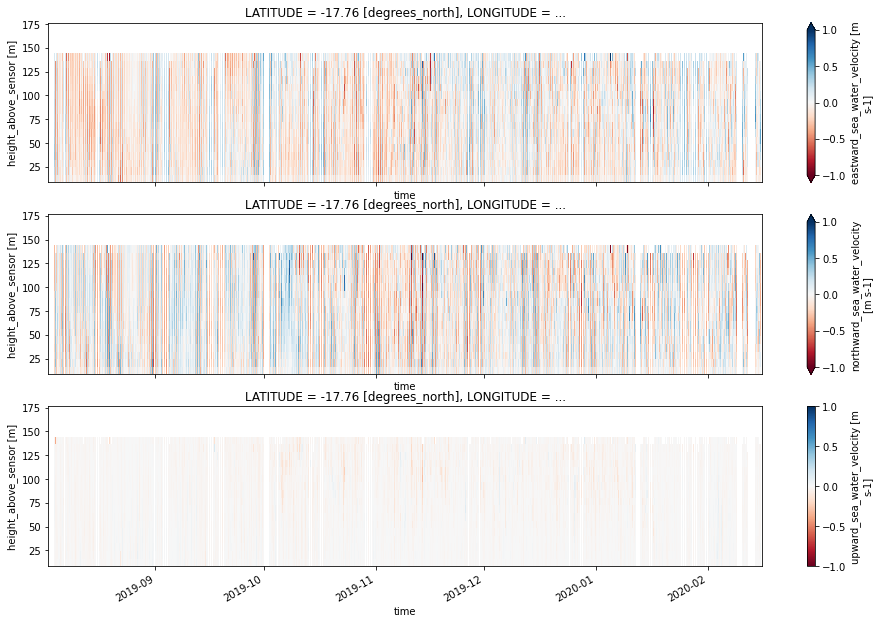

In [62]:
fig,axes = plt.subplots(nrows=3,figsize=(16,10),sharex=True)
ds['UCUR'].where(ds['UCUR_quality_control'] == 1).plot(ax=axes[0],x='TIME',vmin=-1,vmax=1,cmap='RdBu')
ds['VCUR'].where(ds['VCUR_quality_control'] == 1).plot(ax=axes[1],x='TIME',vmin=-1,vmax=1,cmap='RdBu')
ds['WCUR'].where(ds['WCUR_quality_control'] == 1).plot(ax=axes[2],x='TIME',vmin=-1,vmax=1,cmap='RdBu')

Lets zoom in and look at 1 single day of data now and inspect the patterns.

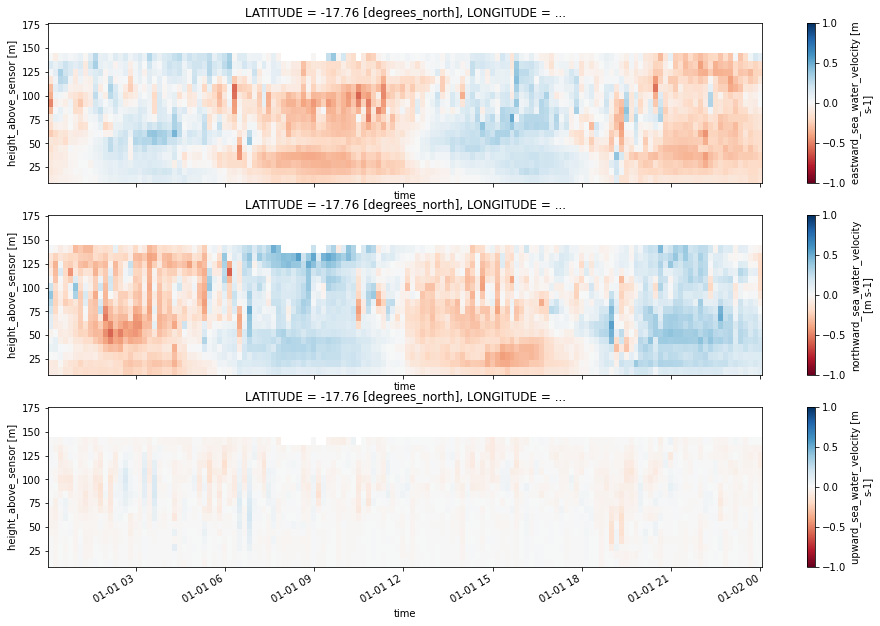

In [63]:
ds_1_day = ds.sel(TIME='2020-01-01')

fig,axes = plt.subplots(nrows=3,figsize=(16,10),sharex=True)
ds_1_day['UCUR'].where(ds_1_day['UCUR_quality_control'] == 1).plot(ax=axes[0],x='TIME',vmin=-1,vmax=1,cmap='RdBu')
ds_1_day['VCUR'].where(ds_1_day['VCUR_quality_control'] == 1).plot(ax=axes[1],x='TIME',vmin=-1,vmax=1,cmap='RdBu')
ds_1_day['WCUR'].where(ds_1_day['WCUR_quality_control'] == 1).plot(ax=axes[2],x='TIME',vmin=-1,vmax=1,cmap='RdBu')

What if we dont care about the vertical profile but just the depth average? We can use the `mean()` method to calculate the mean of the data along the depth (here called 'height_above_sensor') dimension. This time lets see what the effects of the bad data are!

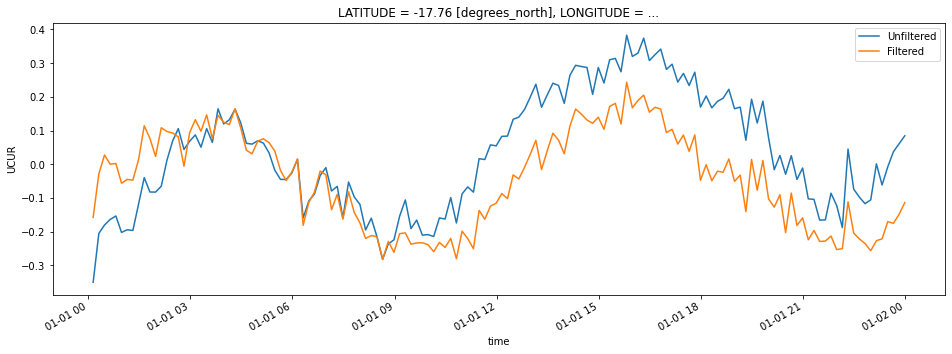

In [64]:
fig,axes = plt.subplots(figsize=(16,5),sharex=True)
ds_1_day['UCUR'].mean('HEIGHT_ABOVE_SENSOR').plot(x='TIME',label='Unfiltered')
ds_1_day['UCUR'].where(ds_1_day['UCUR_quality_control'] == 1).mean('HEIGHT_ABOVE_SENSOR').plot(label='Filtered',x='TIME')
axes.legend()


Or we can just calculate the magnitude of the velocity vector (the speed of the water) and plot that instead. Lets depth average it again though!

Text(0, 0.5, 'Speed (m/s)')

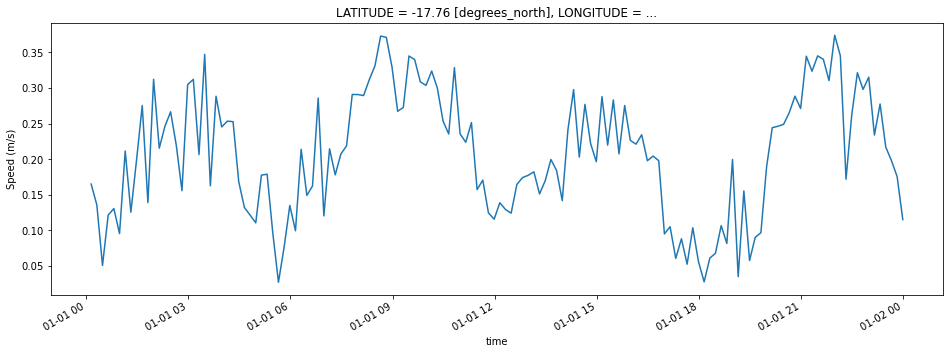

In [65]:
fig,axes = plt.subplots(figsize=(16,5),sharex=True)
ds_1_day['speed'] = np.sqrt(ds_1_day['UCUR'].where(ds_1_day['UCUR_quality_control'] == 1).mean('HEIGHT_ABOVE_SENSOR')**2 + ds_1_day['VCUR'].where(ds_1_day['VCUR_quality_control'] == 1).mean('HEIGHT_ABOVE_SENSOR')**2+ds_1_day['WCUR'].where(ds_1_day['WCUR_quality_control'] == 1).mean('HEIGHT_ABOVE_SENSOR')**2)
ds_1_day['speed'].plot(x='TIME')
# the netCDF doesnt know what the units of speed are because we havent told it! Lets change the ylabel to include the units
axes.set_ylabel('Speed (m/s)')

How about we calculate some statistics for this day of data?

In [66]:
ds_1_day['speed'].mean('TIME') # time average the speed

<xarray.DataArray 'speed' ()>
array(0.20725563, dtype=float32)
Coordinates:
    LATITUDE       float64 -17.76
    LONGITUDE      float64 119.9
    NOMINAL_DEPTH  float32 157.7

In [67]:
ds_1_day['speed'].std('TIME') # standard deviation

<xarray.DataArray 'speed' ()>
array(0.08620526)
Coordinates:
    LATITUDE       float64 -17.76
    LONGITUDE      float64 119.9
    NOMINAL_DEPTH  float32 157.7

In [68]:
ds_1_day['speed'].max('TIME') # maximum speed

<xarray.DataArray 'speed' ()>
array(0.37401614)
Coordinates:
    LATITUDE       float64 -17.76
    LONGITUDE      float64 119.9
    NOMINAL_DEPTH  float32 157.7

In [69]:
ds_1_day['speed'].min('TIME') # minimum speed

<xarray.DataArray 'speed' ()>
array(0.02716819)
Coordinates:
    LATITUDE       float64 -17.76
    LONGITUDE      float64 119.9
    NOMINAL_DEPTH  float32 157.7